In [1]:
from hepmc.core.proposals import Gaussian
from hepmc import surrogate
from hepmc.core.density import Density
from hepmc.core import densities
from hepmc.core.hamiltonian.hmc import HamiltonianUpdate
from hepmc.core.hamiltonian.spherical_hmc import StaticSphericalHMC
from hepmc.core.hamiltonian.wall_hmc import WallHMC
from hepmc.core.sampling import Sample
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
class Exponential(Density):
    def __init__(self):
        super().__init__(2, False)
        
    def pdf(self, xs):
        xs = np.atleast_2d(xs)
        return np.exp(-6*xs[:, 0])
        
    def pot(self, xs):
        xs = np.atleast_2d(xs)
        return 6*xs[:, 0]
    
    def pot_gradient(self, xs):
        xs = np.atleast_2d(xs)
        return np.broadcast_to([6, 0], xs.shape)

In [3]:
target = Exponential()

In [8]:
xvals = np.random.random((10000, 2))
xvals_df = pd.DataFrame(xvals)
fvals = target.pdf(xvals)

In [9]:
fvals

array([0.29528678, 0.00896898, 0.99239854, ..., 0.05912296, 0.06922035,
       0.16525752])

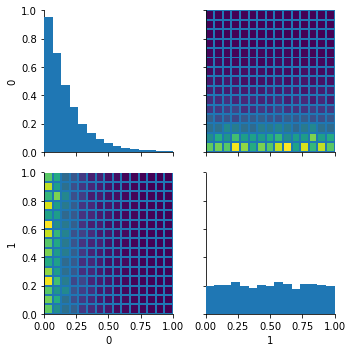

In [10]:
g = sns.PairGrid(xvals_df)
g = g.map_diag(plt.hist, weights=fvals, bins=15)
g = g.map_offdiag(plt.hist2d, weights=fvals, bins=15)

In [ ]:
start = np.random.random(2)
print('start:', start)
print('pdf:', target.pdf(start))
print('pot:', target.pot(start))
print('pot_grad:', target.pot_gradient(start))
sampler = StaticSphericalHMC(target, .01, .01, 5, 5)
start = sampler.sample(5000, start).data[-1] # warmup
%time hmc_sample = sampler.sample(10000, start)

In [ ]:
hmc_sample_df = pd.DataFrame(hmc_sample.data)

In [ ]:
np.partition(hmc_sample.weights, -50)[-50:]

In [ ]:
k = sns.PairGrid(hmc_sample_df)
k = k.map_diag(plt.hist, bins=15, weights=hmc_sample.weights, range=(0, 1))
k = k.map_offdiag(plt.hist2d, bins=15, weights=hmc_sample.weights, range=[[0, 1], [0, 1]], cmax=1)

In [4]:
start = np.random.random(2)
print('start:', start)
print('pdf:', target.pdf(start))
print('pot:', target.pot(start))
print('pot_grad:', target.pot_gradient(start))
sampler = WallHMC(target, .2, .2, 5, 5)
start = sampler.sample(5000, start).data[-1] # warmup
%time wallhmc_sample = sampler.sample(10000, start)

start: [0.15051659 0.07494688]
pdf: [0.40531144]
pot: [0.90309952]
pot_grad: [[6 0]]
Event 1	(batch acceptance rate: 0.000000)
Event 2	(batch acceptance rate: 0.000000)	max sequence length: 3
Event 3	(batch acceptance rate: 0.333333)	max sequence length: 3
Event 4	(batch acceptance rate: 0.500000)	max sequence length: 3
Event 5	(batch acceptance rate: 0.600000)	max sequence length: 3
Event 6	(batch acceptance rate: 0.666667)	max sequence length: 3
Event 7	(batch acceptance rate: 0.714286)	max sequence length: 3
Event 8	(batch acceptance rate: 0.750000)	max sequence length: 3
Event 9	(batch acceptance rate: 0.777778)	max sequence length: 3
Event 10	(batch acceptance rate: 0.800000)	max sequence length: 3
Event 20	(batch acceptance rate: 0.900000)	max sequence length: 3
Event 30	(batch acceptance rate: 0.933333)	max sequence length: 3
Event 40	(batch acceptance rate: 0.950000)	max sequence length: 3
Event 50	(batch acceptance rate: 0.960000)	max sequence length: 3
Event 60	(batch accepta

In [6]:
wallhmc_sample_df = pd.DataFrame(wallhmc_sample.data)

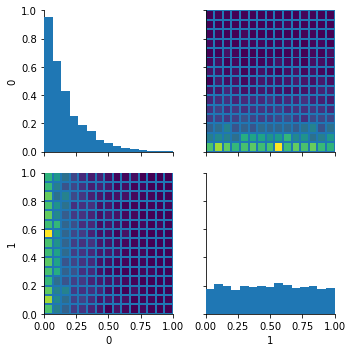

In [7]:
l = sns.PairGrid(wallhmc_sample_df)
l = l.map_diag(plt.hist, bins=15, range=(0, 1))
l = l.map_offdiag(plt.hist2d, bins=15, range=[[0, 1], [0, 1]])